In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [2]:
N = 2**10
def fun(x):
    return 5 * np.sin(4*x) - np.cos(x**2)
def notsofun(x):
    return np.cos(3*x)

Начнем с простого перепечатывания дискретного преобразования с Википедии

In [3]:
def furfur(x):
    N = len(x)
    X = [1 for i in range(N)]
    for k in range(N):
        X[k] = sum([np.exp(-2j * np.pi * n * k/ N) * x[n] for n in range(N)])
    return X   

def rufruf(X):
    N = len(X)
    x = [1 for i in range(N)]
    for n in range(N):
        x[n] = (1/N) * sum([np.exp(2j * np.pi * k * n/ N) * X[k] for k in range(N)])
    return x

На наглядном примере видим, что все работает

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


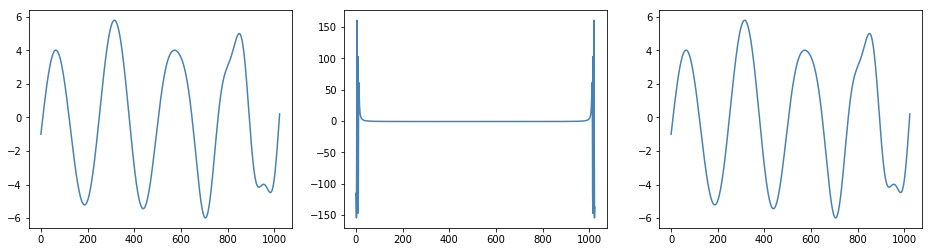

In [4]:
x = np.linspace(0, 2*np.pi, N)
f = fun(x)

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(131)
ax.plot(f, color='steelblue')

ax = fig.add_subplot(132)
F =  furfur(f)
ax.plot(F, color='steelblue')

ax = fig.add_subplot(133)
ff = rufruf(F)
ax.plot(ff, color='steelblue')

Идем дальше: лепим из того, что было фаст фурье:

In [ ]:
def try_fft(x):
    N = len(x)
    if N <= 1: 
        return x
    ch = try_fft(x[0::2])
    nch =  try_fft(x[1::2])
    exp = [np.exp(-2j * np.pi * i / N) * nch[i] for i in range(N//2)]
    #pdb.set_trace()
    return [ch[i] + exp[i] for i in range(N//2)] + [ch[i] - exp[i] for i in range(N//2)]

   
def help_ifft(x):
    N = len(x)
    if N <= 1: 
        return x
    ch = help_ifft(x[0::2])
    nch =  help_ifft(x[1::2])
    exp = [np.exp(2j * np.pi * i / N) * nch[i] for i in range(N//2)]
    return [(ch[i] + exp[i]) for i in range(N//2)] + [(ch[i] - exp[i]) for i in range(N//2)]

def ifft(x):
    N = len(x)
    X = help_ifft(x)
    return [X[i] / N for i in range(N)]

Графики это красиво:

1024


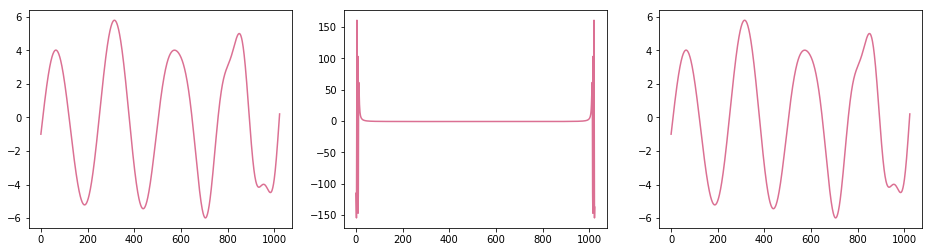

In [9]:
x = np.linspace(0, 2*np.pi, N)
f = fun(x)
print(len(f))

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(131)
ax.plot(f, color='palevioletred')

ax = fig.add_subplot(132)
F = try_fft(f)
ax.plot(F, color='palevioletred')

ax = fig.add_subplot(133)
ff = try_ifft(F)
ax.plot(ff, color='palevioletred')

Для пущего эффекта, вот всевозможные комбинации сравнений:

In [11]:
x = np.random.random(N)

np.allclose(try_fft(x), np.fft.fft(x))
np.allclose(try_ifft(try_fft(x)), x)
np.allclose(rufruf(furfur(x)), x)
np.allclose(furfur(x), np.fft.fft(x))

True

Особый интерес в данной задаче представляет время работы алгоритмов, смотрим:

In [12]:
%timeit furfur(x)

1.53 s ± 36.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit try_fft(x)

13.4 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit np.fft.fft(x)

3.49 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


и видим, что метод "дискретного преобразования без прикрас" ну совершенно не годится

Ускоренный, конечно, работает значительно быстрее, но в то же время, значительно медленне библиотечного(не даром люди старались). Тем не менее, улучшение времени на пару порядков - для нас большой прорыв